# Biostat M280 Homework 1

#### Due Apr 27 @ 11:59PM

## Q1

**No handwritten homework reports are accepted for this course.**  We work with Git/GitHub.  Efficient and abundant use of Git, e.g., **frequent and well-documented** commits, is an important criterion for grading your homework.

0. Apply for the [Student Developer Pack](https://education.github.com/pack) at GitHub using your UCLA email.

0. Create a **private** repository `biostat-m280-2018-spring` and add `Hua-Zhou` and `LuZhangstat` (TA) as your collaborators.

0. Top directories of the repository should be `hw1`, `hw2`, ... Create two branches `master` and `develop`. The `develop` branch will be your main playground, the place where you develop solution (code) to homework problems and write up report. The `master` branch will be your presentation area. Put your homework submission files (IJulia notebook `.ipynb`, html converted from notebook, all code and data set to reproduce results) in `master` branch.  

0. After each homework due date, teaching assistant and instructor will check out your `master` branch for grading. Tag each of your homework submissions with tag names `hw1`, `hw2`, ...  Tagging time will be used as your submission time. That means if you tag your hw1 submission after deadline, penalty points will be deducted for late submission.  

0. Read the [style guide](https://github.com/johnmyleswhite/Style.jl) for Julia programming by John Myles White. Following rules in the style guide will be strictly enforced when grading: (4), (6), (7), (8), (9), (12), (13) and (16).

## Q2

Let's check whether floating-point numbers obey certain algebraic rules.  
0. Associative rule for addition says `(x + y) + z == x + (y + z)`. Check association rule using `x = 0.1`, `y = 0.1` and `z = 1.0` in Julia. Explain what you find.

0. Do floating-point numbers obey the associative rule for multiplication: `(x * y) * z == x * (y * z)`?

0. Do floating-point numbers obey the distributive rule: `a * (x + y) == a * x + a * y`?  

0. Is `0 * x == 0` true for all floating-point number `x`?  

0. Is `x / a == x * (1 / a)` always true?

## A2.1

In [192]:
x = 0.1
y = 0.1 
z = 1.0;

In [127]:
(x + y) + z == x + (y + z)

false

In [132]:
(x + y) + z

1.2

In [133]:
x + (y + z)

1.2000000000000002

From the above results we can see that the **associative rule for addition** is **not valid** for floating point numbers. This is because floating point arithmetic uses a formulaic representation of real numbers as an approximation to support a trade-off between range and precision. Because of this approximate representation, the LHS and RHS do not match.

## A2.2

In [134]:
(x * y) * z == x * (y * z)

true

In [162]:
x = 0.1
y = 0.1 
z = 100.0;
(x * y) * z == x * (y * z)

false

In [136]:
(x * y) * z

1.0000000000000002

In [137]:
x * (y * z)

1.0

From the above results we can see that floating point numbers do **not obey** the **associative rule for multiplication**. This is because when the range of real number values is different, the approximation in floating point arithmetic varies and the LHS and RHS do not match.

## A2.3

In [164]:
a = 100.0
x = 0.1
y = 0.2;
a * (x + y) == a * x + a * y

false

In [166]:
a * (x + y)

30.000000000000004

In [165]:
a * x + a * y

30.0

From the above results we can see that floating point numbers do **not obey** the **distributive rule for multiplication**.

## A2.4

In [182]:
x = Inf;
0 * x == 0

false

In [183]:
0 * x

NaN

In [184]:
typeof(x)

Float64

`0 * x == 0` is **not true** for all floating point numbers. As we can see when x = infinity of type Float64, the equality does not hold.

## A2.5

In [199]:
x = 0.1
a = 5.0;
x / a == x * (1 / a)

false

In [200]:
x / a

0.02

In [201]:
x * (1 / a)

0.020000000000000004

`x / a == x * (1 / a)` is **not always true** for floating point numbers.

Note: In addition to the corner cases demonstrated above, floating point arithmetic is also prone to numerical underflow and overflow leading to incorrect answers.

## Q3

Consider Julia function
```julia
function g(k)
    for i = 1:10
        k = 5k - 1
    end
    k
end
```
0. Use `@code_llvm` to find the LLVM bitcode of compiled `g` with `Int64` input.   
1. Use `@code_llvm` to find the LLVM bitcode of compiled `g` with `Float64` input.  
2. Compare the bitcode from questions 1 and 2. What do you find?  
3. Read Julia documentation on `@fastmath` and repeat the questions 1-3 on the function  

```julia
function g_fastmath(k)  
    @fastmath for i = 1:10  
        k = 5k - 1
    end
    k
end
```
Explain what does macro `@fastmath` do?

In [202]:
function g(k)
    for i = 1:10
        k = 5k - 1
    end
    k
end

g (generic function with 1 method)

## A3.1

In [213]:
@code_llvm g(2)


define i64 @julia_g_65254(i64) #0 !dbg !5 {
top:
  %1 = mul i64 %0, 9765625
  %2 = add i64 %1, -2441406
  ret i64 %2
}


## A3.2

In [205]:
@code_llvm g(2.0)


define double @julia_g_65249(double) #0 !dbg !5 {
top:
  %1 = fmul double %0, 5.000000e+00
  %2 = fadd double %1, -1.000000e+00
  %3 = fmul double %2, 5.000000e+00
  %4 = fadd double %3, -1.000000e+00
  %5 = fmul double %4, 5.000000e+00
  %6 = fadd double %5, -1.000000e+00
  %7 = fmul double %6, 5.000000e+00
  %8 = fadd double %7, -1.000000e+00
  %9 = fmul double %8, 5.000000e+00
  %10 = fadd double %9, -1.000000e+00
  %11 = fmul double %10, 5.000000e+00
  %12 = fadd double %11, -1.000000e+00
  %13 = fmul double %12, 5.000000e+00
  %14 = fadd double %13, -1.000000e+00
  %15 = fmul double %14, 5.000000e+00
  %16 = fadd double %15, -1.000000e+00
  %17 = fmul double %16, 5.000000e+00
  %18 = fadd double %17, -1.000000e+00
  %19 = fmul double %18, 5.000000e+00
  %20 = fadd double %19, -1.000000e+00
  ret double %20
}


## A3.3
From the bitcode for Q3.1 and Q3.2, we can see that the LLVM compiler identifies the argument type as Int64 and Float64 correctly without having to explicitly specify it and optimizes the for loop in the function g(k) for Int64 arguments. Because of the Just-in-time (JIT) compilation capabilities of LLVM, the Int64 code gets optimized such that the bitcode generated involves just 1 set of multiplication and addition instructions - for the last value that needs to be returned. As opposed to that, for Float64, the LLVM bitcode performs multiplication and addition in each iteration of the for loop in the function g(k). 

In [214]:
function g_fastmath(k)  
    @fastmath for i = 1:10  
        k = 5k - 1
    end
    k
end

g_fastmath (generic function with 1 method)

In [215]:
@code_llvm g_fastmath(2)


define i64 @julia_g_fastmath_65327(i64) #0 !dbg !5 {
top:
  %1 = mul i64 %0, 9765625
  %2 = add i64 %1, -2441406
  ret i64 %2
}


In [216]:
@code_llvm g_fastmath(2.0)


define double @julia_g_fastmath_65328(double) #0 !dbg !5 {
top:
  %1 = fmul fast double %0, 9.765625e+06
  %2 = fadd fast double %1, -2.441406e+06
  ret double %2
}


## A3.4
@fastmath allows floating point optimizations that are correct for real numbers, but lead to differences for IEEE numbers. By using @fastmath in the for loop in our new function, the bitcode for Float64 arguments gets optimized too. This results in just one set of float multiplicatio and addition instructions generated in the bitcode for a Float64 argument (similar to the bitcode for Int64) as opposed to the 20 pairs of multiplication and addition instructions seen before. 

## Q4

Create the vector `x = (0.988, 0.989, 0.990, ..., 1.010, 1.011, 1.012)`.  
0. Plot the polynomial `y = x^7 - 7x^6 + 21x^5 - 35x^4 + 35x^3 - 21x^2 + 7x -1` at points `x`.  

1. Plot the polynomial `y = (x - 1)^7` at points `x`.  

2. Explain what you found.

In [225]:
x = collect(0.988:0.001:1.012);

## A4.1

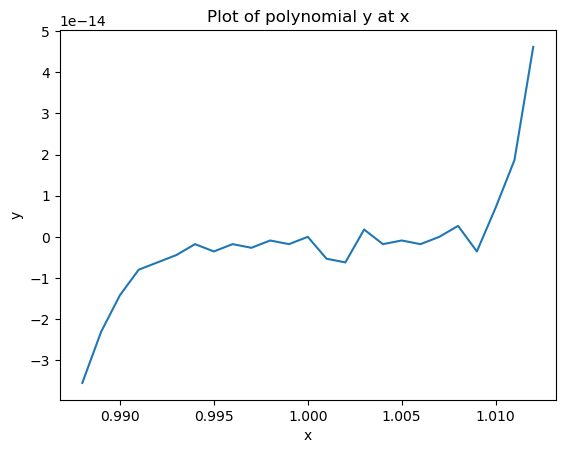

PyObject Text(0.5,1,'Plot of polynomial y at x')

In [226]:
y1 = x.^7 - 7x.^6 + 21x.^5 - 35x.^4 + 35x.^3 - 21x.^2 + 7x -1
#Pkg.add("PyPlot")
using PyPlot
plot(x, y1)
xlabel("x")
ylabel("y")
title("Plot of polynomial y at x")

## A4.2

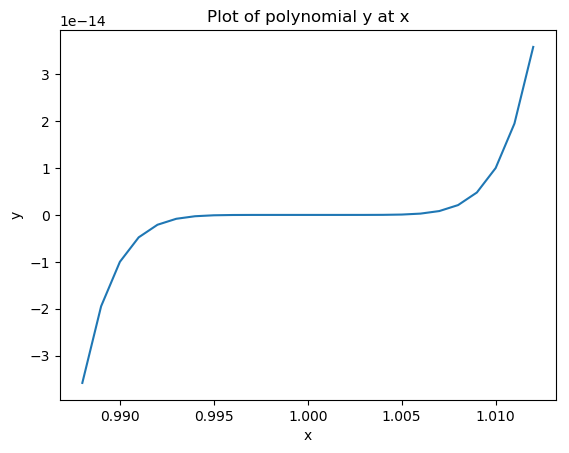

PyObject Text(0.5,1,'Plot of polynomial y at x')

In [223]:
y2 = (x - 1).^7
using PyPlot
plot(x, y2)
xlabel("x")
ylabel("y")
title("Plot of polynomial y at x")

## A4.3
From the above 2 plots we can see that the curve is smoother for the second polynomial than it is for the first polynomial. This is because the second polynomial has only one power in its exponent, 7 leading to a uniformity in the floating point approximations for all values of x. As opposed to that, the first polynomial has 8 different powers in its exponent ranging from 7 to 0 each associated with a different constant as its multiplying factor. Although the first polynomial is simply the expanded form of the second polynomial, we obtain 2 different looking curves because of the floating point numbers in x. This behavior is especially pronounced when the value of y = 0. 

## Q5

Let the $n \times n$ matrix `H` have elements `H[i, j] = 1 / (i + j - 1)`.  
0. Write a function `h(n)` that outputs $n \times n$ matrix `H`. Try at least 3 ways, e.g., looping, [comprehension](https://docs.julialang.org/en/stable/manual/arrays/#Comprehensions-1), and vectorization. Compute and print `H` for `n = 5`.   
0. Compare their efficiencies at `n = 1000`.
0. Try different rounding modes (use function `setrounding(Float64, RoundingMode)`) and report the entry `inv(H)[1, 1]` for `n = 15`.

In [262]:
function h(n, method)
    H = zeros(n, n) 
    if method == 1
        # looping
        for i in 1:n
            for j in 1:n
                H[i, j] = 1 / (i + j - 1)
            end
        end
    elseif method == 2
        # comprehension
        H = [[1 / (i + j - 1) for i=1:n] for j=1:n]
    elseif method == 3
        # vectorization
        for i in 1:n
            @simd for j in 1:n
                @inbounds H[i, j] = 1 / (i + j - 1)
            end
        end  
    else
        println("Incorrect method") 
    end
    H
end

h (generic function with 1 method)

## A5.1

In [269]:
# looping
h(5, 1)

5×5 Array{Float64,2}:
 1.0       0.5       0.333333  0.25      0.2     
 0.5       0.333333  0.25      0.2       0.166667
 0.333333  0.25      0.2       0.166667  0.142857
 0.25      0.2       0.166667  0.142857  0.125   
 0.2       0.166667  0.142857  0.125     0.111111

In [270]:
# comprehension
h(5, 2)

5-element Array{Array{Float64,1},1}:
 [1.0, 0.5, 0.333333, 0.25, 0.2]           
 [0.5, 0.333333, 0.25, 0.2, 0.166667]      
 [0.333333, 0.25, 0.2, 0.166667, 0.142857] 
 [0.25, 0.2, 0.166667, 0.142857, 0.125]    
 [0.2, 0.166667, 0.142857, 0.125, 0.111111]

In [271]:
# vectorization
h(5, 3)

5×5 Array{Float64,2}:
 1.0       0.5       0.333333  0.25      0.2     
 0.5       0.333333  0.25      0.2       0.166667
 0.333333  0.25      0.2       0.166667  0.142857
 0.25      0.2       0.166667  0.142857  0.125   
 0.2       0.166667  0.142857  0.125     0.111111

## A5.2

In [306]:
# looping
@benchmark h(1000, 1)

BenchmarkTools.Trial: 
  memory estimate:  7.63 MiB
  allocs estimate:  2
  --------------
  minimum time:     4.873 ms (0.00% GC)
  median time:      5.831 ms (0.00% GC)
  mean time:        6.958 ms (17.76% GC)
  maximum time:     27.728 ms (70.08% GC)
  --------------
  samples:          717
  evals/sample:     1

In [307]:
# comprehension
@benchmark h(1000, 2)

BenchmarkTools.Trial: 
  memory estimate:  15.39 MiB
  allocs estimate:  1003
  --------------
  minimum time:     3.472 ms (0.00% GC)
  median time:      7.125 ms (37.55% GC)
  mean time:        6.639 ms (35.09% GC)
  maximum time:     13.815 ms (52.22% GC)
  --------------
  samples:          751
  evals/sample:     1

In [308]:
# vectorization
@benchmark h(1000, 3)

BenchmarkTools.Trial: 
  memory estimate:  7.63 MiB
  allocs estimate:  2
  --------------
  minimum time:     4.864 ms (0.00% GC)
  median time:      5.320 ms (0.00% GC)
  mean time:        6.390 ms (17.60% GC)
  maximum time:     15.224 ms (35.06% GC)
  --------------
  samples:          780
  evals/sample:     1

In the above function, 3 different methods - looping, list comprehension and vectorization have been implemented for creating the matrix H. Vectorization is of 2 types - 1) Writing your code in terms of operations that operate on whole arrays and 2) Compiler Transformations. This function demonstrates compiler transformations that exploit SIMD instructions when executing the nested for loop. The @simd macro gives the compiler license to vectorize without checking whether it will change the program's visible behavior. The vectorized code will behave as if the code were written to operate on chunks of the arrays. @simd promises that all iterations are independent of each other. @inbounds turns off subscrpt checking that might throw exceptions so as to avoid branching in code. Straight line loop body and unit-stride access pattern enable us to use this type of vectorization. 
As seen in the above benchmark results for n = 1000, we can see that list comprehension has the maximum number of memory estimate and allocations. The results for vectorization are better than looping but we cannot observe a significant difference as sometimes the LLVM compiler vectorizes loops by default.

## A5.3

In [252]:
H = h(15, 1);
inv(H)[1, 1]

158.1023247167468

In [250]:
setrounding(Float64, RoundDown) do
    inv(H)[1, 1]         
end

147.25887333601713

In [251]:
setrounding(Float64, RoundUp) do
    inv(H)[1, 1]         
end

151.9317292883061

In [253]:
setrounding(Float64, RoundToZero) do
    inv(H)[1, 1]         
end

149.61413742601871

In [258]:
# default
setrounding(Float64, RoundNearest) do
    inv(H)[1, 1]         
end

158.1023247167468

## Q6

0. Show the **Sherman-Morrison formula**
$$
	(\mathbf{A} + \mathbf{u} \mathbf{u}^T)^{-1} = \mathbf{A}^{-1} - \frac{1}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}} \mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1},
$$
where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular and $\mathbf{u} \in \mathbb{R}^n$. This formula supplies the inverse of the symmetric, rank-one  perturbation of $\mathbf{A}$.

0. Show the **Woodbury formula**
$$
	(\mathbf{A} + \mathbf{U} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1},
$$
where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular, $\mathbf{U}, \mathbf{V} \in \mathbb{R}^{n \times m}$, and $\mathbf{I}_m$ is the $m \times m$ identity matrix. In many applications $m$ is much smaller than $n$. Woodbury formula generalizes Sherman-Morrison and is valuable because the smaller matrix $\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}$ is cheaper to invert than the larger matrix $\mathbf{A} + \mathbf{U} \mathbf{V}^T$.

0. Show the **binomial inversion formula**
$$
	(\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1},
$$
where $\mathbf{A}$ and $\mathbf{B}$ are nonsingular.

0. Show the identity
$$
	\text{det}(\mathbf{A} + \mathbf{U} \mathbf{V}^T) = \text{det}(\mathbf{A}) \text{det}(\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}).
$$
This formula is useful for evaluating the density of a multivariate normal with covariance matrix $\mathbf{A} + \mathbf{U} \mathbf{V}^T$.

## A6.1
**Sherman-Morrison formula** 

## A6.2
**Woodbury formula** 

## A6.3
**Binomial inversion formula**

## A6.4
**Density of a multivariate normal with covariance matrix  A+UVT